<a href="https://colab.research.google.com/github/Garyzhao231/g_ai_project/blob/main/Copy_of_recent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
# Read in data
df = pd.read_excel('/content/30topics sheet.xlsx')


In [ ]:
df.head()

,Comment Type,Comment,Author,Likes,Published At,cleanComments,tokens,topics,c_text,t2vTopicTag
0,Main Comment,"If he wanted a publicity stunt, why not a mock...",@brianpendell6085,0,2024-01-17T20:11:00Z,"If he wanted a publicity stunt, why not a mock...","['want', 'publicity', 'stunt', 'trial', 'remem...","{'court': 0.0, 'trial': 0.0, '1980s': 0.0, 'ta...",want publicity stunt trial remember people cou...,4
1,Main Comment,Its also incredibly unethical. The cases befor...,@sanskaarkulkarni1036,0,2023-12-03T20:24:07Z,The cases before the supreme court often deci...,"['case', 'supreme', 'court', 'often', 'decide'...","{'decide': 0.0, 'amendment': 0.0, 'wealth': 0....",case supreme court often decide course history...,4
2,Main Comment,I can foresee a time when AI lawyers replace p...,@himwhoisnottobenamed5427,0,2023-11-22T23:49:11Z,I can foresee a time when AI lawyers replace p...,"['foresee', 'lawyer', 'replace', 'public', 'de...","{'coming': 0.0, 'defender': 0.0, 'foresee': 0....",foresee lawyer replace public defender coming ...,4
3,Main Comment,"<a href=""https://www.youtube.com/watch?v=Tpq3h...",@monroerobbins7551,0,2023-11-08T23:29:46Z,11:56 this shouldnt make me laugh as much as i...,"['11:56', 'laugh']","{'11:56': 0.0, 'laugh': 0.0}",11:56 laugh,26
4,Main Comment,"&quot;Hey ChatGPT, where is it legal to wear A...",@minetruly,1,2023-11-08T08:25:59Z,"""Hey ChatGPT, where is it legal to wear Airpod...","['chatgpt', 'legal', 'airpods', 'court""""i', 'l...","{'legal': 0.0, 'airpods': 0.0, 'additionally':...","chatgpt legal airpods court""""i large language ...",4


In [ ]:
example = df['c_text']
print(example)

0        want publicity stunt trial remember people cou...
1        case supreme court often decide course history...
2        foresee lawyer replace public defender coming ...
3                                              11:56 laugh
4        chatgpt legal airpods court""i large language ...
                               ...                        
20941                                              channel
20942    professional musician almost years whenever re...
20943    chatgpt letter write people bring tears readin...
20944    suddenly reveal majority exist mainstream ente...
20945    already hear mainstream artist perry handful o...
Name: c_text, Length: 20946, dtype: object


In [ ]:


# Assuming 'example' is your Pandas DataFrame column containing text data
tokens = example.apply(lambda x: nltk.word_tokenize(str(x)))

# Or if 'example' is a single string containing multiple sentences, you can directly tokenize it
#tokens = nltk.word_tokenize(example)

#tokens = nltk.word_tokenize(example)

In [ ]:

flattened_tokens = [token for sublist in tokens for token in sublist]
# Perform part-of-speech tagging
tagged = nltk.pos_tag(flattened_tokens)
tagged[:10]  # Display the first 10 tagged tokens


[('want', 'JJ'),
 ('publicity', 'NN'),
 ('stunt', 'NN'),
 ('trial', 'NN'),
 ('remember', 'VBP'),
 ('people', 'NNS'),
 ('court', 'NN'),
 ('1980s', 'CD'),
 ('take', 'NN'),
 ('litigant', 'JJ')]

In [ ]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [ ]:
example_string = '|'.join(example.astype(str))  # Convert the entire Series to a single string
scores = sia.polarity_scores(example_string)

#sia.polarity_scores(example)

In [ ]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['c_text']
    myid = row['t2vTopicTag']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/20946 [00:00<?, ?it/s]

In [ ]:
print(res)

{4: {'neg': 0.615, 'neu': 0.385, 'pos': 0.0, 'compound': -0.4939}, 26: {'neg': 0.0, 'neu': 0.558, 'pos': 0.442, 'compound': 0.8591}, 12: {'neg': 0.1, 'neu': 0.594, 'pos': 0.306, 'compound': 0.8399}, 20: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, 7: {'neg': 0.15, 'neu': 0.85, 'pos': 0.0, 'compound': -0.5574}, 13: {'neg': 0.0, 'neu': 0.573, 'pos': 0.427, 'compound': 0.7351}, 3: {'neg': 0.516, 'neu': 0.484, 'pos': 0.0, 'compound': -0.4939}, 0: {'neg': 0.1, 'neu': 0.519, 'pos': 0.381, 'compound': 0.7579}, 8: {'neg': 0.0, 'neu': 0.688, 'pos': 0.312, 'compound': 0.7402}, 6: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, 21: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, 17: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, 5: {'neg': 0.084, 'neu': 0.752, 'pos': 0.164, 'compound': 0.2023}, 1: {'neg': 0.159, 'neu': 0.727, 'pos': 0.114, 'compound': -0.0772}, 16: {'neg': 0.0, 'neu': 0.551, 'pos': 0.449, 'compound': 0.9442}, 24: {'neg': 0.154, 'neu': 0.846, 'pos':

In [ ]:
# Now we have sentiment score and metadata
#vaders.head()

NameError: name 'vaders' is not defined

In [ ]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
#vaders = vaders.merge(df, how='left')

In [ ]:
vaders.head()

,Id,neg,neu,pos,compound
0,4,0.615,0.385,0.000,-0.4939
1,26,0.000,0.558,0.442,0.8591
2,12,0.100,0.594,0.306,0.8399
3,20,0.000,1.000,0.000,0.0000
4,7,0.150,0.850,0.000,-0.5574


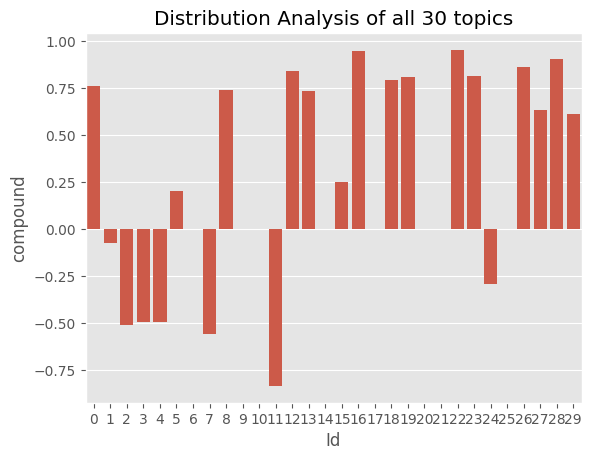

In [ ]:
ax = sns.barplot(data=vaders, x='Id', y='compound')
ax.set_title('Distribution Analysis of all 30 topics')
plt.show()

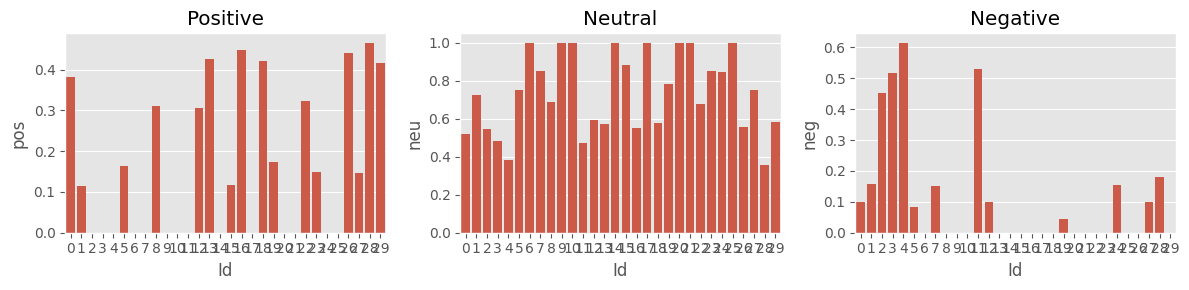

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Id', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Id', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Id', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

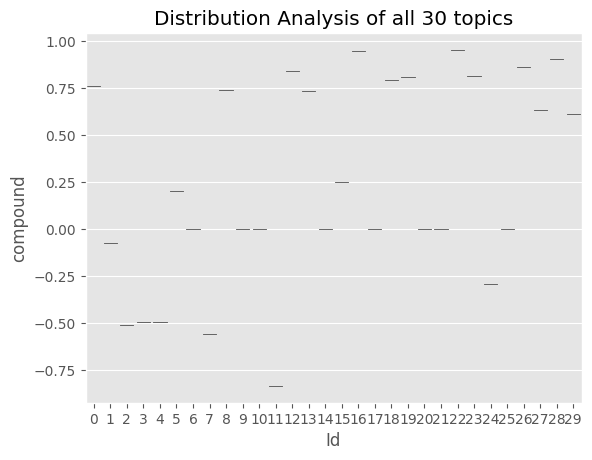

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'vaders' is your DataFrame
# Create the violin plot
ax = sns.violinplot(data=vaders, x='Id', y='compound')

# Set the title of the plot
ax.set_title('Distribution Analysis of all 30 topics')

# Show the plot
plt.show()
